# Adapted Bar Charts
Histograms and bar charts depict the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

In [10]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [11]:
# import data
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [12]:
# data info
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [13]:
# data head
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


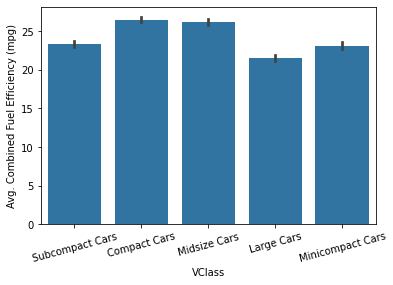

In [14]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

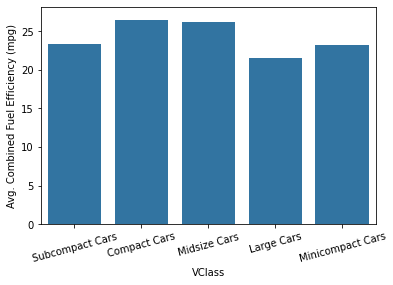

In [15]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

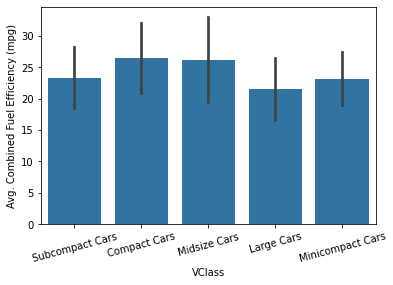

In [16]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## point plot

As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

By default, pointplot will connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via linestyles = "" for nominal data.

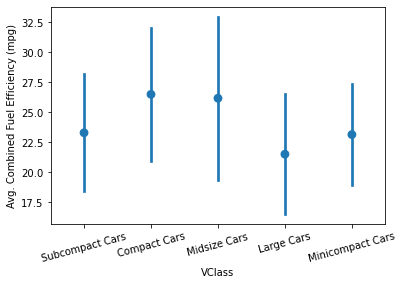

In [17]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="");
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

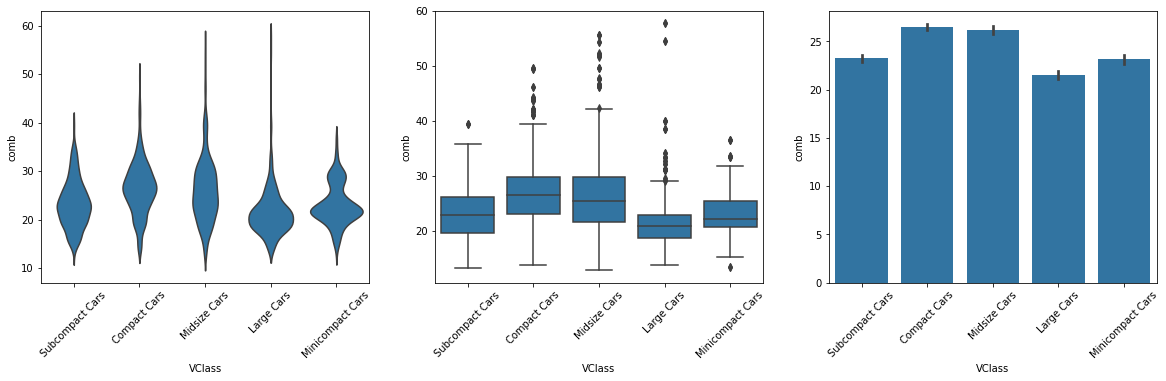

In [18]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);